<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Spectral_clustering_for_image_segmentation_Rayi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra
1103213070
Task Lecture 6 Clustering
Spectral clustering for image segmentation

**Generate the data**

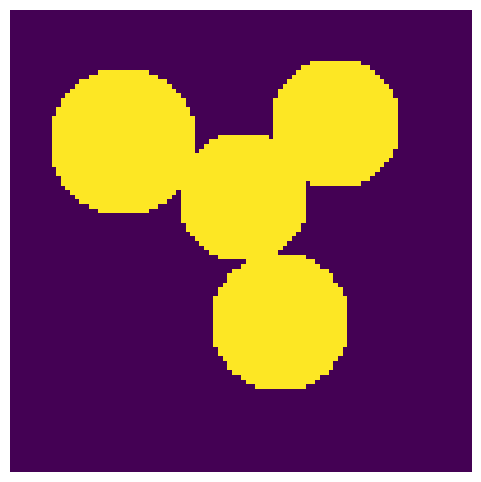

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

# Visualisasi gambar
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(circle1 + circle2 + circle3 + circle4, cmap='viridis', interpolation='nearest')
plt.axis('off')
plt.show()


**Plotting four circles**

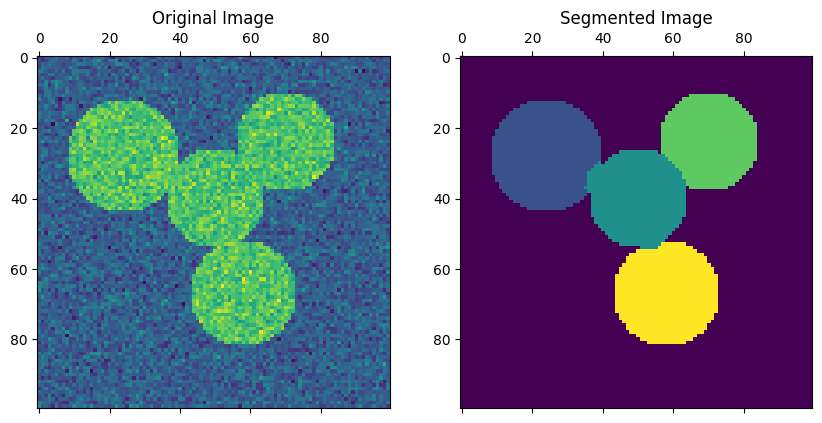

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Membuat gambar dengan beberapa lingkaran
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

# Membuat gambar dengan lingkaran-linakaran
img = circle1 + circle2 + circle3 + circle4

# Membuat mask yang membatasi ke foreground
mask = img.astype(bool)

# Menambahkan noise ke gambar
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Konversi gambar menjadi graf
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

# Melakukan spectral clustering
labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

# Visualisasi hasil
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[0].set_title('Original Image')
axs[1].matshow(label_im)
axs[1].set_title('Segmented Image')

plt.show()


**Plotting two circles**

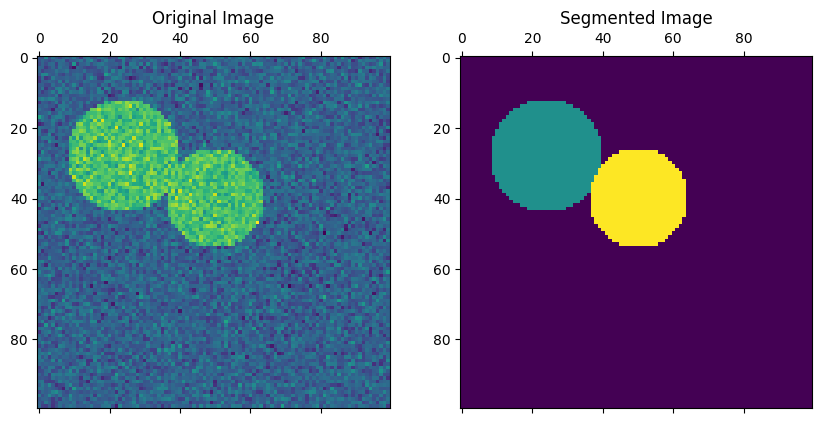

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Membuat gambar dengan dua lingkaran
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)

radius1, radius2 = 16, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2

# Membuat gambar dengan dua lingkaran
img = circle1 + circle2

# Membuat mask yang membatasi ke foreground
mask = img.astype(bool)

# Menambahkan noise ke gambar
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Konversi gambar menjadi graf
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

# Melakukan spectral clustering
labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

# Visualisasi hasil
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[0].set_title('Original Image')
axs[1].matshow(label_im)
axs[1].set_title('Segmented Image')

plt.show()
